# Week 4. Case 2
Cognitive Systems for Health Technology Applications


## Import libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

## Building network

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9248)              0         
__________

In [23]:
from keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adadelta(),
              metrics=['acc'])

## Data preprocessing

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),

    # We read images in batches
    batch_size=20,
    
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [25]:
# Testing that train generator works
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [26]:
# Check the last labels batch
labels_batch

array([0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1.], dtype=float32)

## Modeling

In [27]:


history = model.fit_generator(
      train_generator,
      steps_per_epoch = 18,
      verbose = 1,
      epochs = 50,
      validation_data = validation_generator,
      validation_steps = 18)

# Save the model
model.save('case_2_run_5.h5')

Epoch 1/50
18/18 [==============================] - 123s 7s/step - loss: 0.5808 - acc: 0.6833 - val_loss: 0.6739 - val_acc: 0.7167
Epoch 2/50
18/18 [==============================] - 70s 4s/step - loss: 0.6526 - acc: 0.7028 - val_loss: 0.6284 - val_acc: 0.6966
Epoch 3/50
18/18 [==============================] - 80s 4s/step - loss: 0.5790 - acc: 0.7160 - val_loss: 0.5168 - val_acc: 0.7107
Epoch 4/50
18/18 [==============================] - 85s 5s/step - loss: 0.5793 - acc: 0.6944 - val_loss: 0.6027 - val_acc: 0.7222
Epoch 5/50
18/18 [==============================] - 72s 4s/step - loss: 0.5149 - acc: 0.7139 - val_loss: 0.4938 - val_acc: 0.7331
Epoch 6/50
18/18 [==============================] - 65s 4s/step - loss: 0.5080 - acc: 0.7299 - val_loss: 0.5831 - val_acc: 0.6994
Epoch 7/50
18/18 [==============================] - 69s 4s/step - loss: 0.5064 - acc: 0.7444 - val_loss: 0.4868 - val_acc: 0.7306
Epoch 8/50
18/18 [==============================] - 68s 4s/step - loss: 0.5465 - acc: 0.7

First attempt 30 epochs with base model, accuracy and loss were oscillating wildly.

Second attempt 30 epochs with increased learning rate, oscillation is still heavy

Epochs 30, Increasing steps per epoch to 20, batch size to 20, validation steps to 20 resulted in a bit of overfitting.

Tweaking model, introducing dropout layers, increasing epochs, changed optimizer to adamdelta

Epochs over 30 seem introduce overfitting to this model.

## Results

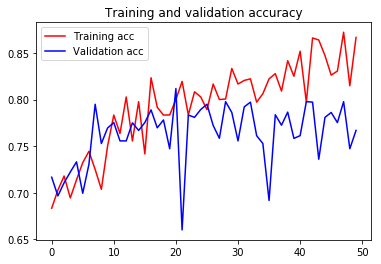

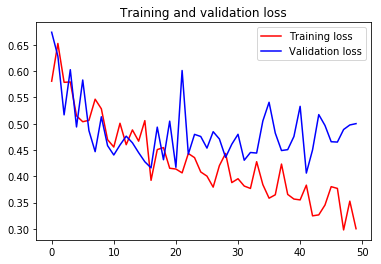

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b',c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b',c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()